In [4]:
library(gprofiler2)
library(ggplot2)
library(RColorBrewer)

In [5]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/gene_expression_correlation_cluster_summaries.csv"
df = read.csv(filename, row.names=1)

In [6]:
head(df)

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16
ENSG00000000003_TSPAN6,-0.03278743,-0.02595152,-0.019489200,0.20812960,0.17928511,-0.088145315,-0.040269599,-0.158662375,0.15397092,-0.22751871,-0.156336242,-0.07582469,-0.123315748,0.16045604,-0.036377457,-0.002197800,0.228378584
ENSG00000000419_DPM1,-0.08145661,-0.11340380,0.019654544,0.20310854,0.29530274,-0.079552321,0.021093978,-0.151843105,0.20247987,-0.20891601,-0.224050465,-0.14857201,-0.027481700,0.13360443,-0.011352074,0.019903492,0.183526454
ENSG00000000457_SCYL3,0.01138163,-0.01006154,0.003808672,0.01177544,0.03234050,-0.047882180,0.007956968,-0.001453939,0.03135984,-0.01929688,-0.008375386,-0.03011747,0.000307631,0.02226312,0.007341185,-0.010535033,0.004225529
ENSG00000000460_C1orf112,-0.02364342,-0.13402487,0.078225980,0.06275032,0.18055390,-0.049309400,0.016680058,-0.039126612,0.12964136,-0.06779328,-0.143645815,-0.09973966,0.053287117,0.06215576,0.005501806,0.004165092,0.025859535
ENSG00000001036_FUCA2,-0.22178467,-0.18145921,0.149194493,0.25267897,0.19711342,-0.007098826,0.256418349,-0.072815457,0.20619317,-0.28575780,0.044347077,0.01882798,-0.076504633,0.31591438,-0.251135733,0.212603173,-0.085116960
ENSG00000001084_GCLC,-0.04837921,-0.06994902,0.096400635,0.09821645,0.02199214,0.053369134,0.059449915,-0.008822399,0.02540003,-0.09170745,-0.055233689,0.09582720,-0.011069014,0.09428823,-0.118771810,0.092344802,-0.003718091


In [7]:
########### Genes positively correlated with cluster summary profiles

In [80]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.5]
    if (length(genes_pos)==0){next}
    # order
    genes_pos = genes_pos[order(genes_pos, decreasing = T)]
    # get gene names only
    genes = gsub(".*_","",names(genes_pos))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [81]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}

In [82]:
length(pats)

[1] 71

In [83]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [84]:
# df_to_plot

In [85]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2",
                                       "cluster7", "cluster0", "cluster11", "cluster14",
                                       "cluster8", "cluster15"))

[1] "cluster0"  "cluster2"  "cluster3"  "cluster4"  "cluster6"  "cluster7" 
 [7] "cluster8"  "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14"
[13] "cluster15" "cluster16"

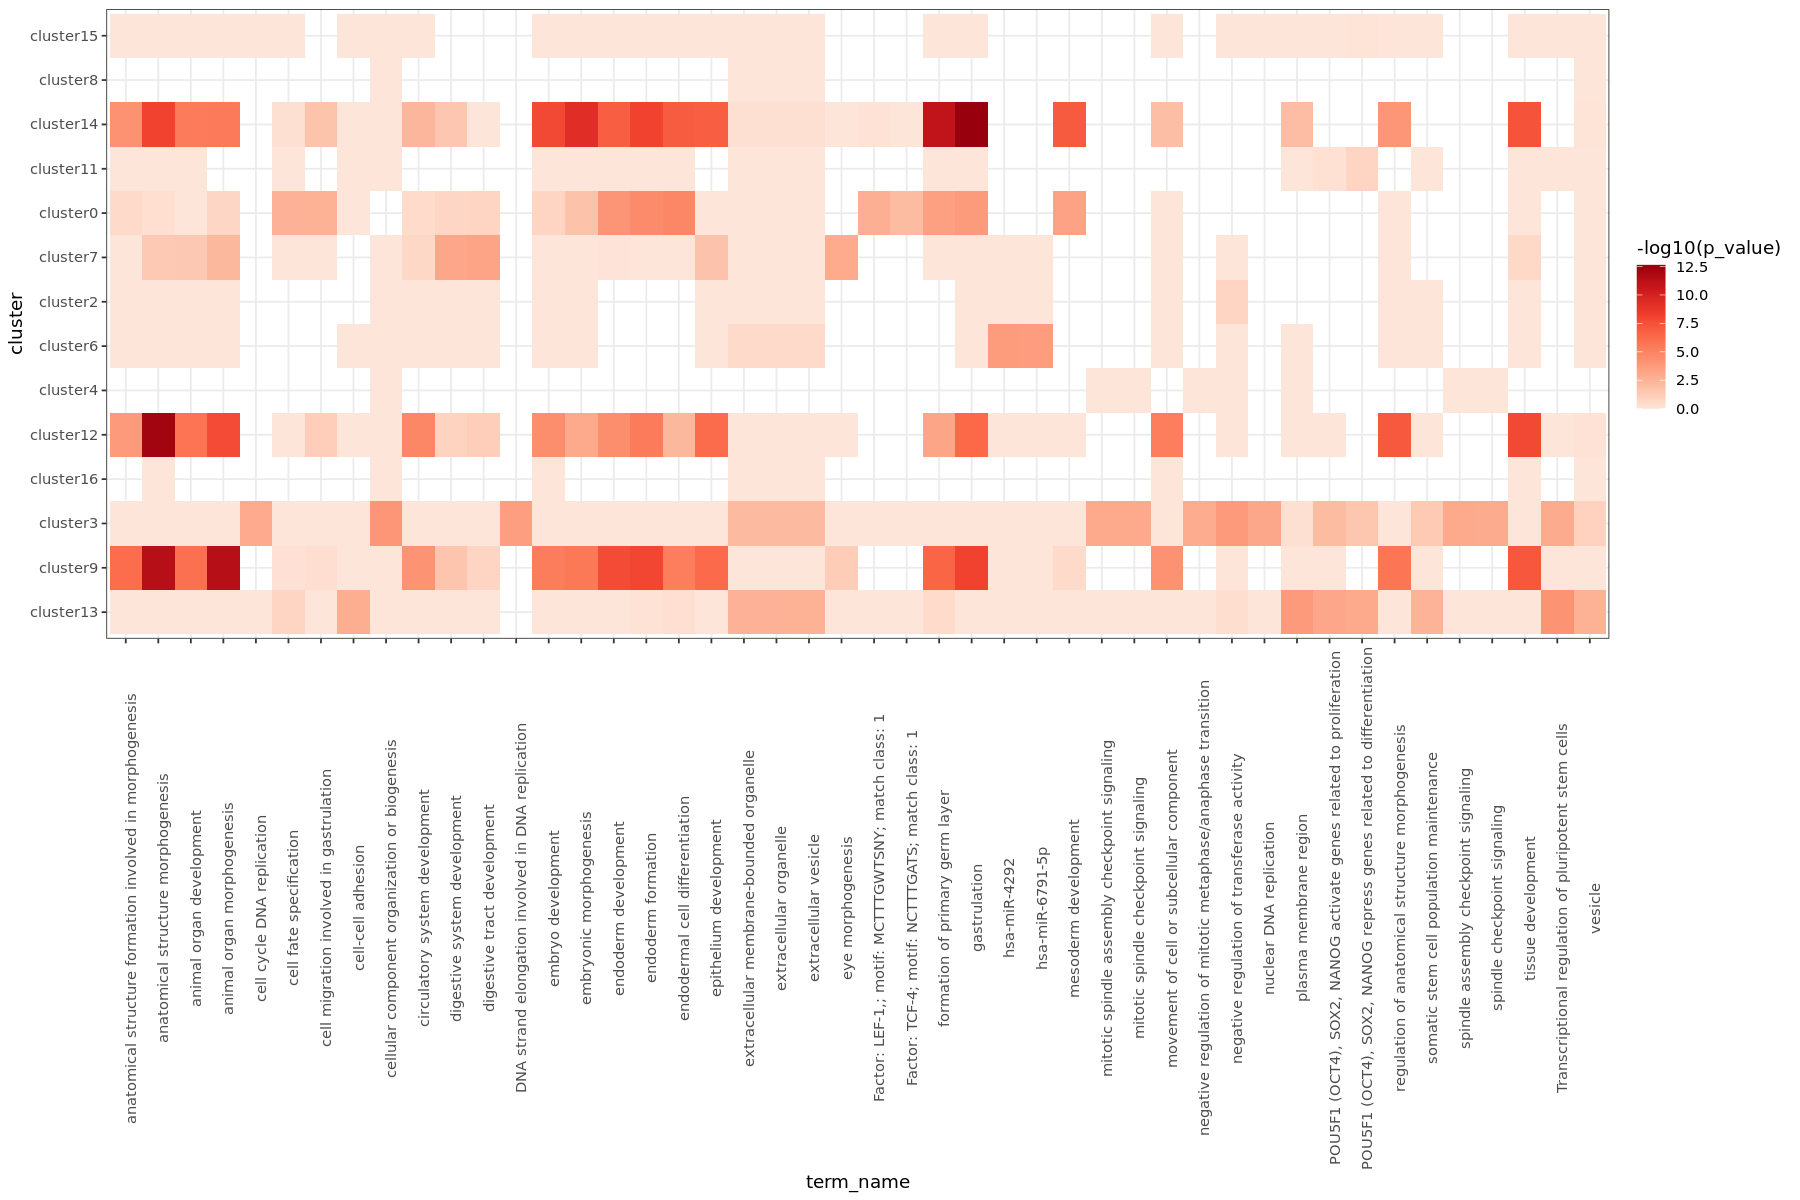

In [86]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [15]:
########### Genes negatively correlated with cluster summary profiles

In [16]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
#     print(head(gene_list))
    # get negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.5)]
    if (length(genes_neg)==0){next}
    # order
    genes_neg = genes_neg[order(genes_neg)]
    # get gene names only
    genes = gsub(".*_","",names(genes_neg))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [17]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 53

In [18]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [19]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster3"  "cluster4"  "cluster5"  "cluster6"  "cluster7" 
 [7] "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14" "cluster15"
[13] "cluster16"

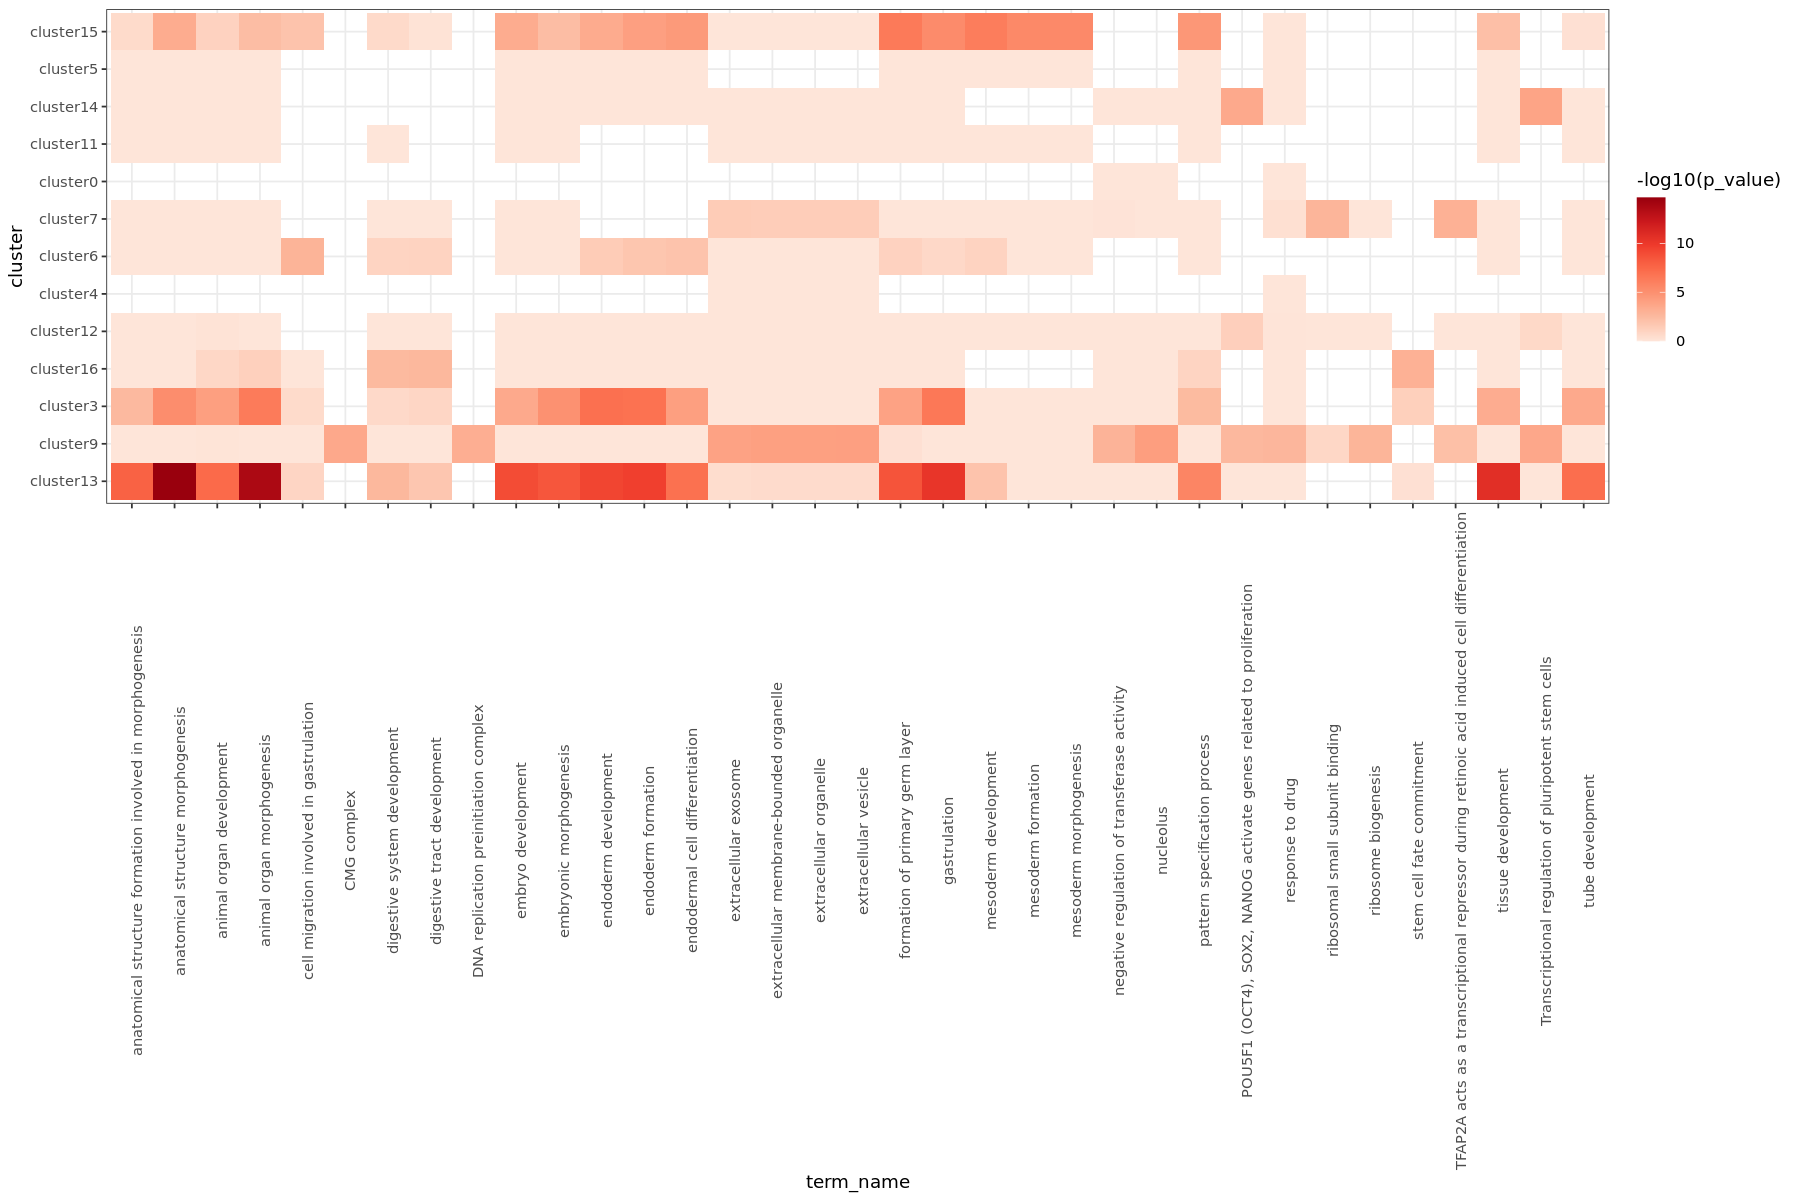

In [20]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [21]:
########### Genes either positively or negatively correlated with cluster summary profiles

In [112]:
df_list = list()
for (i in 1:ncol(df)){
    gene_list = df[,i]
    names(gene_list) = rownames(df)
    # get positively correlated genes
    genes_pos = gene_list[gene_list>0.5]
    # AND negatively correlated genes
    genes_neg = gene_list[gene_list<(-0.5)]
    genes_corr = c(genes_pos, genes_neg)
    genes_corr = abs(genes_corr)
    if (length(genes_corr)==0){next}
    # order
    genes_corr = genes_corr[order(genes_corr,decreasing=TRUE)]
    # get gene names only
    genes = gsub(".*_","",names(genes_corr))
    # run gprofiler
    gres = gost(query=genes, organism = "hsapiens", ordered_query = TRUE, significant=FALSE)
    df_list[[i]] = as.data.frame(gres$result)
}

In [113]:
pats = c()
for (i in 1:length(df_list)){
    if (is.null(df_list[[i]])){next}
    df_curr = as.data.frame(df_list[[i]])
    df_curr = df_curr[df_curr$p_value < 0.05/17,]
#     print(nrow(df_curr))
    n = min(10, nrow(df_curr))
    pats = c(pats, unique(df_curr[1:n,"term_name"]))
}
length(pats)

[1] 82

In [114]:
df_to_plot = data.frame()
for (i in 1:length(df_list)){
    cluster = paste0("cluster",(i-1))
    df_curr = df_list[[i]]
    if (is.null(df_curr)){next}
    df_curr$cluster = cluster
    df_to_plot = rbind(df_to_plot, df_curr[df_curr$term_name %in% pats,
                                           c("p_value","cluster","term_name","term_id")])
}

In [115]:
unique(df_to_plot$cluster)
df_to_plot$cluster <- factor(df_to_plot$cluster, 
                             levels = c("cluster13", "cluster9", "cluster3", "cluster16", 
                                        "cluster12", "cluster4", "cluster6", "cluster2", "cluster7", 
                                        "cluster0", "cluster11", "cluster14","cluster5", "cluster15"))

[1] "cluster0"  "cluster2"  "cluster3"  "cluster4"  "cluster5"  "cluster6" 
 [7] "cluster7"  "cluster9"  "cluster11" "cluster12" "cluster13" "cluster14"
[13] "cluster15" "cluster16"

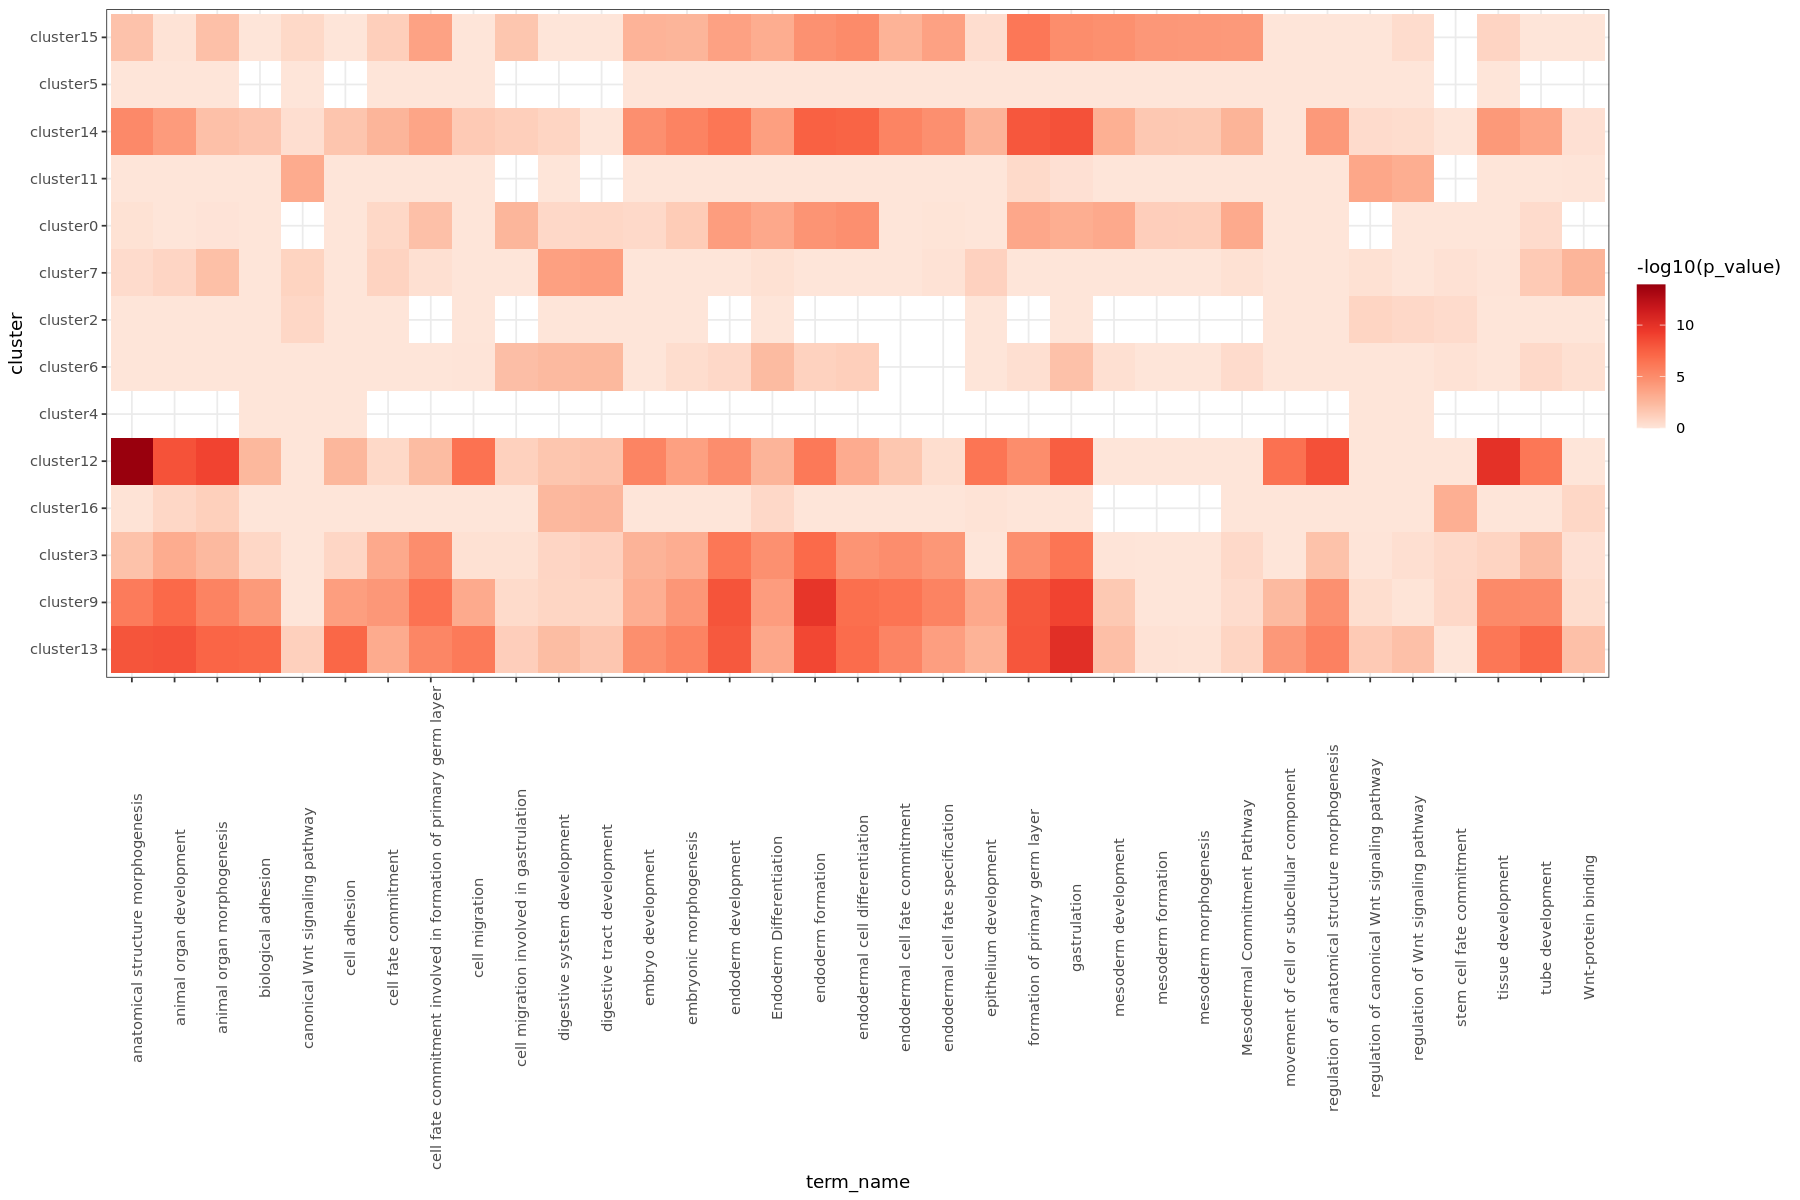

In [116]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(df_to_plot, aes(x=term_name, y=cluster, fill = -log10(p_value))) + geom_tile() + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90)) + 
    scale_fill_gradientn(colors = brewer.pal(7,"Reds"))

In [117]:
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [118]:
head(df_to_plot)

,p_value,cluster,term_name,term_id
10,1.589545e-05,cluster0,endodermal cell differentiation,GO:0035987
11,2.778511e-05,cluster0,endoderm formation,GO:0001706
12,9.203453e-05,cluster0,endoderm development,GO:0007492
13,3.473967e-04,cluster0,formation of primary germ layer,GO:0001704
14,4.293742e-04,cluster0,mesoderm development,GO:0007498
15,8.266773e-04,cluster0,gastrulation,GO:0007369


In [119]:
df_to_plot$cluster = as.character(df_to_plot$cluster)
df_to_plot$term_name = as.character(df_to_plot$term_name)

In [120]:
mat = matrix(0, nrow=length(unique(df_to_plot$cluster)), ncol=length(unique(df_to_plot$term_name)))
for (i in 1:nrow(mat)){
    cluster = unique(df_to_plot$cluster)[i]
    for (j in 1:ncol(mat)){
        term = unique(df_to_plot$term_name)[j]
#         print(term)
        if (length(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"]) == 0){next}
        mat[i,j] = min(df_to_plot[df_to_plot$cluster == cluster & df_to_plot$term_name == term,"p_value"])
    }
}
rownames(mat) = unique(df_to_plot$cluster)
colnames(mat) = unique(df_to_plot$term_name)

In [121]:
mat

,endodermal cell differentiation,endoderm formation,endoderm development,formation of primary germ layer,mesoderm development,gastrulation,cell migration involved in gastrulation,cell fate commitment involved in formation of primary germ layer,embryonic morphogenesis,mesoderm formation,...,animal organ development,stem cell fate commitment,regulation of anatomical structure morphogenesis,biological adhesion,regulation of Wnt signaling pathway,Endoderm Differentiation,Mesodermal Commitment Pathway,regulation of canonical Wnt signaling pathway,canonical Wnt signaling pathway,Wnt-protein binding
cluster0,1.589545e-05,2.778511e-05,9.203453e-05,3.473967e-04,4.293742e-04,8.266773e-04,0.002434614,9.428918e-03,4.032660e-02,5.617817e-02,...,1.000000e+00,1.000000000,1.000000e+00,1.000000e+00,1.0000000000,4.084970e-04,5.003313e-04,0.0000000000,0.0000000000,0.000000000
cluster2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000000,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,0.298221029,1.000000e+00,1.000000e+00,0.1975302510,1.000000e+00,0.000000e+00,0.1246763983,0.1665771702,1.000000000
cluster3,2.911296e-05,1.155424e-07,5.330895e-07,1.440340e-05,9.136901e-01,4.384503e-07,0.567829379,1.144301e-05,7.590225e-04,1.000000e+00,...,6.184273e-04,0.213480918,1.158476e-02,1.682926e-01,0.4590319239,1.756001e-05,2.286359e-01,0.9034236861,1.0000000000,0.547948285
cluster4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000000,0.000000e+00,1.000000e+00,1.0000000000,0.000000e+00,0.000000e+00,1.0000000000,1.0000000000,0.000000000
cluster5,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000000,1.000000e+00,0.000000e+00,1.0000000000,1.000000e+00,1.000000e+00,1.0000000000,1.0000000000,0.000000000
cluster6,6.122665e-02,8.841235e-02,1.946757e-01,4.675269e-01,5.376164e-01,1.086533e-02,0.007445223,1.000000e+00,3.522546e-01,1.000000e+00,...,1.000000e+00,0.675561923,1.000000e+00,1.000000e+00,1.0000000000,4.886208e-03,2.940341e-01,1.0000000000,1.0000000000,0.498395923
cluster7,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000000,5.430238e-01,1.000000e+00,1.000000e+00,...,1.338871e-01,0.613094472,1.000000e+00,1.000000e+00,1.0000000000,5.971836e-01,5.753791e-01,0.5681159797,0.1081696979,0.002185937
cluster9,1.954603e-07,1.683551e-10,6.898951e-09,1.163943e-08,2.786583e-02,1.095109e-09,0.275779000,3.040365e-07,3.943919e-05,1.000000e+00,...,9.826489e-08,0.195181119,1.667299e-05,5.962138e-05,0.8561682761,8.633185e-05,3.223388e-01,0.3977114646,1.0000000000,0.364821859
cluster11,1.000000e+00,1.000000e+00,1.000000e+00,2.422315e-01,1.000000e+00,5.498386e-01,0.000000000,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000000,1.000000e+00,1.000000e+00,0.0008208695,1.000000e+00,1.000000e+00,0.0003272671,0.0005840264,0.897531321
cluster12,5.997063e-04,7.166092e-07,1.205526e-05,1.058737e-05,1.000000e+00,2.283737e-08,0.076934452,5.357107e-03,1.334128e-04,1.000000e+00,...,5.398478e-09,1.000000000,4.424624e-09,3.004903e-03,1.0000000000,1.861204e-03,1.000000e+00,1.0000000000,1.0000000000,1.000000000


In [122]:
mat0 = -log10(mat)
mat0

,endodermal cell differentiation,endoderm formation,endoderm development,formation of primary germ layer,mesoderm development,gastrulation,cell migration involved in gastrulation,cell fate commitment involved in formation of primary germ layer,embryonic morphogenesis,mesoderm formation,...,animal organ development,stem cell fate commitment,regulation of anatomical structure morphogenesis,biological adhesion,regulation of Wnt signaling pathway,Endoderm Differentiation,Mesodermal Commitment Pathway,regulation of canonical Wnt signaling pathway,canonical Wnt signaling pathway,Wnt-protein binding
cluster0,4.798727,4.556188,4.0360492,3.4591743,3.36716402,3.0826640,2.6135700,2.0255381,1.3944083,1.2504324,...,0.0000000,0.0000000,0.000000,0.000000,0.00000000,3.3888112,3.3007423,Inf,Inf,Inf
cluster2,Inf,Inf,Inf,Inf,Inf,0.0000000,Inf,Inf,0.0000000,Inf,...,0.0000000,0.5254617,0.000000,0.000000,0.70436638,0.0000000,Inf,0.90421575,0.7783845,0.00000000
cluster3,4.535914,6.937259,6.2731999,4.8415348,0.03920107,6.3580796,0.2457821,4.9414598,3.1197453,0.0000000,...,3.2087113,0.6706409,1.936113,0.773935,0.33815711,4.7554752,0.6408556,0.04410853,0.0000000,0.26126043
cluster4,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,...,Inf,Inf,Inf,0.000000,0.00000000,Inf,Inf,0.00000000,0.0000000,Inf
cluster5,0.000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,Inf,0.0000000,0.0000000,0.0000000,...,0.0000000,Inf,0.000000,Inf,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,Inf
cluster6,1.213060,1.053487,0.7106881,0.3301934,0.26952753,1.9639570,2.1281223,0.0000000,0.4531433,0.0000000,...,0.0000000,0.1703348,0.000000,0.000000,0.00000000,2.3110280,0.5316023,0.00000000,0.0000000,0.30242552
cluster7,0.000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.2651812,0.0000000,0.0000000,...,0.8732613,0.2124726,0.000000,0.000000,0.00000000,0.2238921,0.2400459,0.24556299,0.9658944,2.66036231
cluster9,6.708941,9.773774,8.1612170,7.9340682,1.55492799,8.9605428,0.5594388,6.5170742,4.4040720,0.0000000,...,7.0076016,0.7095622,4.777986,4.224598,0.06744087,4.0638290,0.4916875,0.40043189,0.0000000,0.43791915
cluster11,0.000000,0.000000,0.0000000,0.6157693,0.00000000,0.2597648,Inf,0.0000000,0.0000000,0.0000000,...,0.0000000,Inf,0.000000,0.000000,3.08572586,0.0000000,0.0000000,3.48509767,3.2335675,0.04695039
cluster12,3.222061,6.144718,4.9188233,4.9752120,0.00000000,7.6413540,1.1138791,2.2710697,3.8748025,0.0000000,...,8.2677286,0.0000000,8.354124,2.522169,0.00000000,2.7302061,0.0000000,0.00000000,0.0000000,0.00000000


In [123]:
mat0[mat0==Inf] = -1
mat0

,endodermal cell differentiation,endoderm formation,endoderm development,formation of primary germ layer,mesoderm development,gastrulation,cell migration involved in gastrulation,cell fate commitment involved in formation of primary germ layer,embryonic morphogenesis,mesoderm formation,...,animal organ development,stem cell fate commitment,regulation of anatomical structure morphogenesis,biological adhesion,regulation of Wnt signaling pathway,Endoderm Differentiation,Mesodermal Commitment Pathway,regulation of canonical Wnt signaling pathway,canonical Wnt signaling pathway,Wnt-protein binding
cluster0,4.798727,4.556188,4.0360492,3.4591743,3.36716402,3.0826640,2.6135700,2.0255381,1.3944083,1.2504324,...,0.0000000,0.0000000,0.000000,0.000000,0.00000000,3.3888112,3.3007423,-1.00000000,-1.0000000,-1.00000000
cluster2,-1.000000,-1.000000,-1.0000000,-1.0000000,-1.00000000,0.0000000,-1.0000000,-1.0000000,0.0000000,-1.0000000,...,0.0000000,0.5254617,0.000000,0.000000,0.70436638,0.0000000,-1.0000000,0.90421575,0.7783845,0.00000000
cluster3,4.535914,6.937259,6.2731999,4.8415348,0.03920107,6.3580796,0.2457821,4.9414598,3.1197453,0.0000000,...,3.2087113,0.6706409,1.936113,0.773935,0.33815711,4.7554752,0.6408556,0.04410853,0.0000000,0.26126043
cluster4,-1.000000,-1.000000,-1.0000000,-1.0000000,-1.00000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,-1.0000000,...,-1.0000000,-1.0000000,-1.000000,0.000000,0.00000000,-1.0000000,-1.0000000,0.00000000,0.0000000,-1.00000000
cluster5,0.000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,-1.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,-1.0000000,0.000000,-1.000000,0.00000000,0.0000000,0.0000000,0.00000000,0.0000000,-1.00000000
cluster6,1.213060,1.053487,0.7106881,0.3301934,0.26952753,1.9639570,2.1281223,0.0000000,0.4531433,0.0000000,...,0.0000000,0.1703348,0.000000,0.000000,0.00000000,2.3110280,0.5316023,0.00000000,0.0000000,0.30242552
cluster7,0.000000,0.000000,0.0000000,0.0000000,0.00000000,0.0000000,0.0000000,0.2651812,0.0000000,0.0000000,...,0.8732613,0.2124726,0.000000,0.000000,0.00000000,0.2238921,0.2400459,0.24556299,0.9658944,2.66036231
cluster9,6.708941,9.773774,8.1612170,7.9340682,1.55492799,8.9605428,0.5594388,6.5170742,4.4040720,0.0000000,...,7.0076016,0.7095622,4.777986,4.224598,0.06744087,4.0638290,0.4916875,0.40043189,0.0000000,0.43791915
cluster11,0.000000,0.000000,0.0000000,0.6157693,0.00000000,0.2597648,-1.0000000,0.0000000,0.0000000,0.0000000,...,0.0000000,-1.0000000,0.000000,0.000000,3.08572586,0.0000000,0.0000000,3.48509767,3.2335675,0.04695039
cluster12,3.222061,6.144718,4.9188233,4.9752120,0.00000000,7.6413540,1.1138791,2.2710697,3.8748025,0.0000000,...,8.2677286,0.0000000,8.354124,2.522169,0.00000000,2.7302061,0.0000000,0.00000000,0.0000000,0.00000000


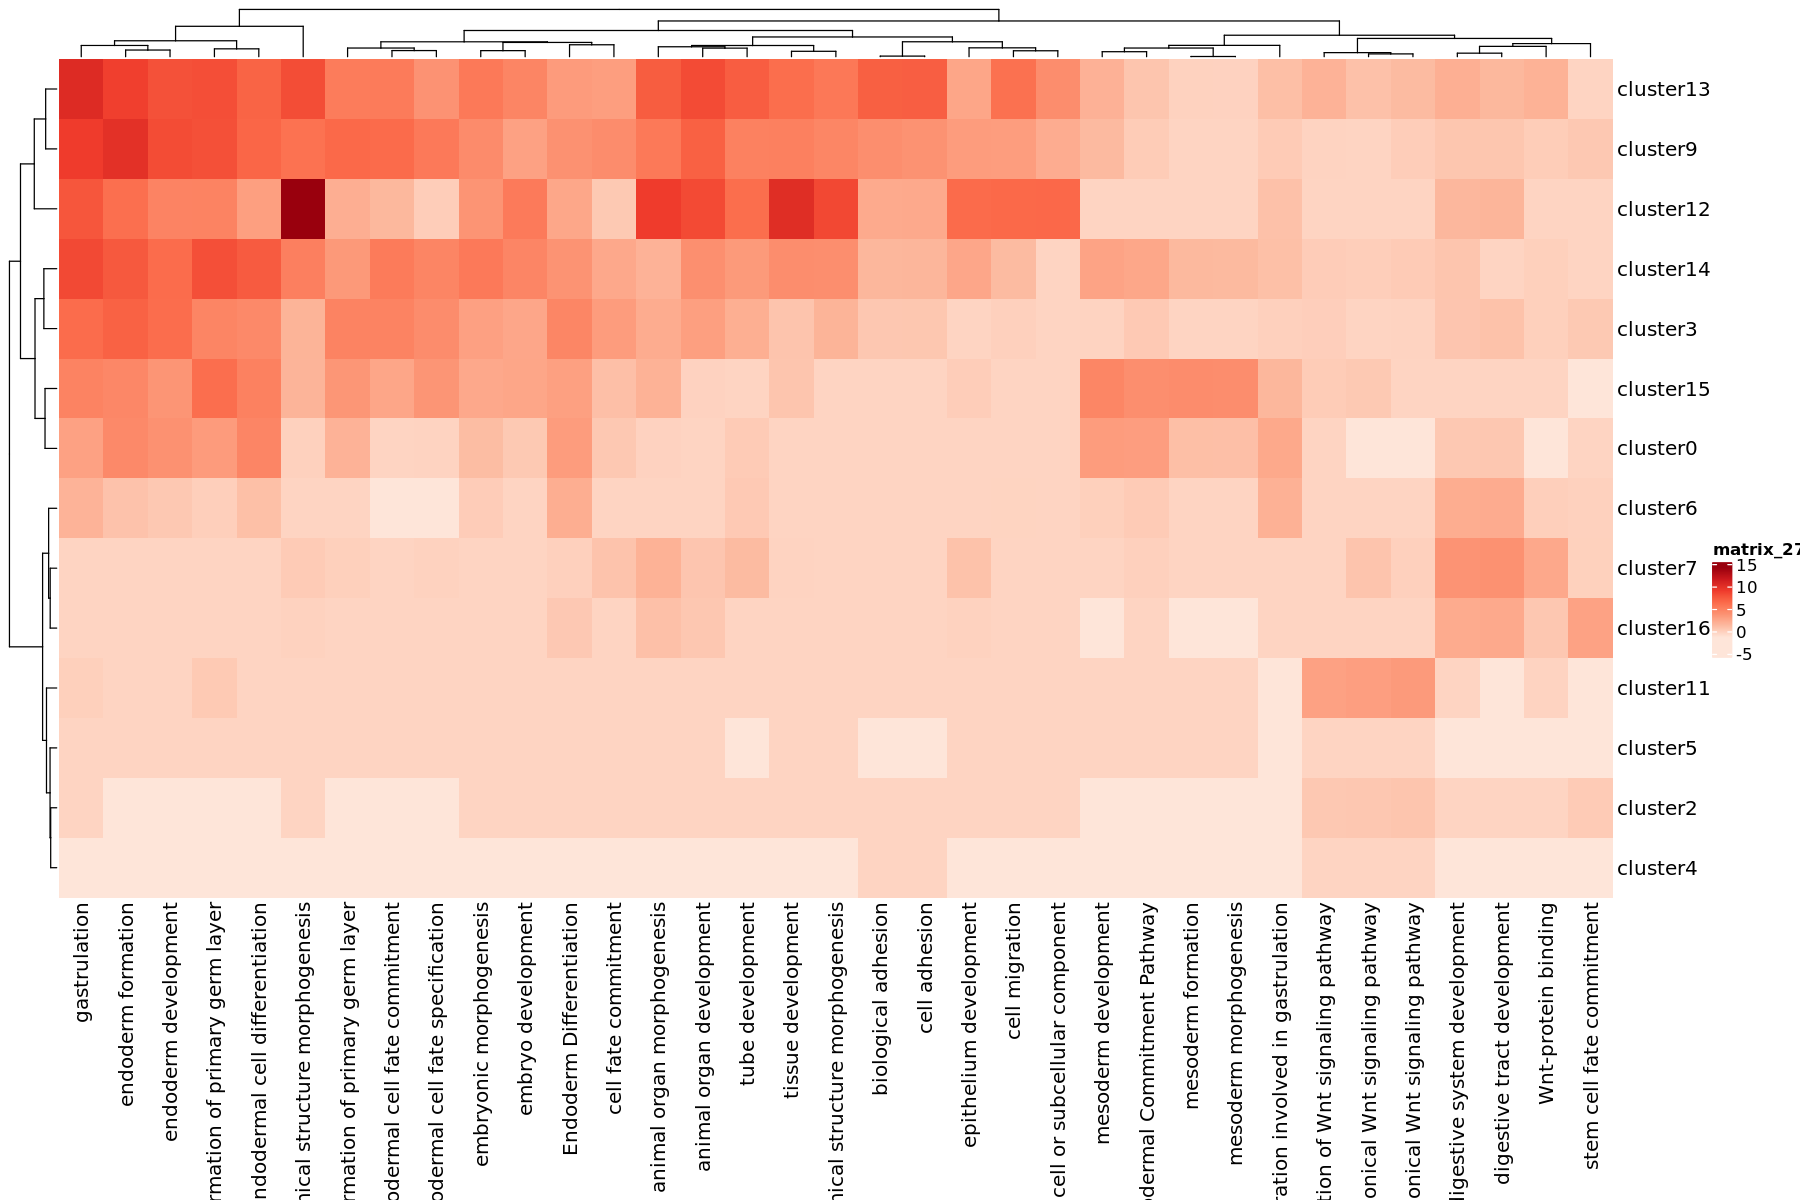

In [124]:
options(repr.plot.width = 15, repr.plot.height = 10)
Heatmap(mat0, col = brewer.pal(7,"Reds"))

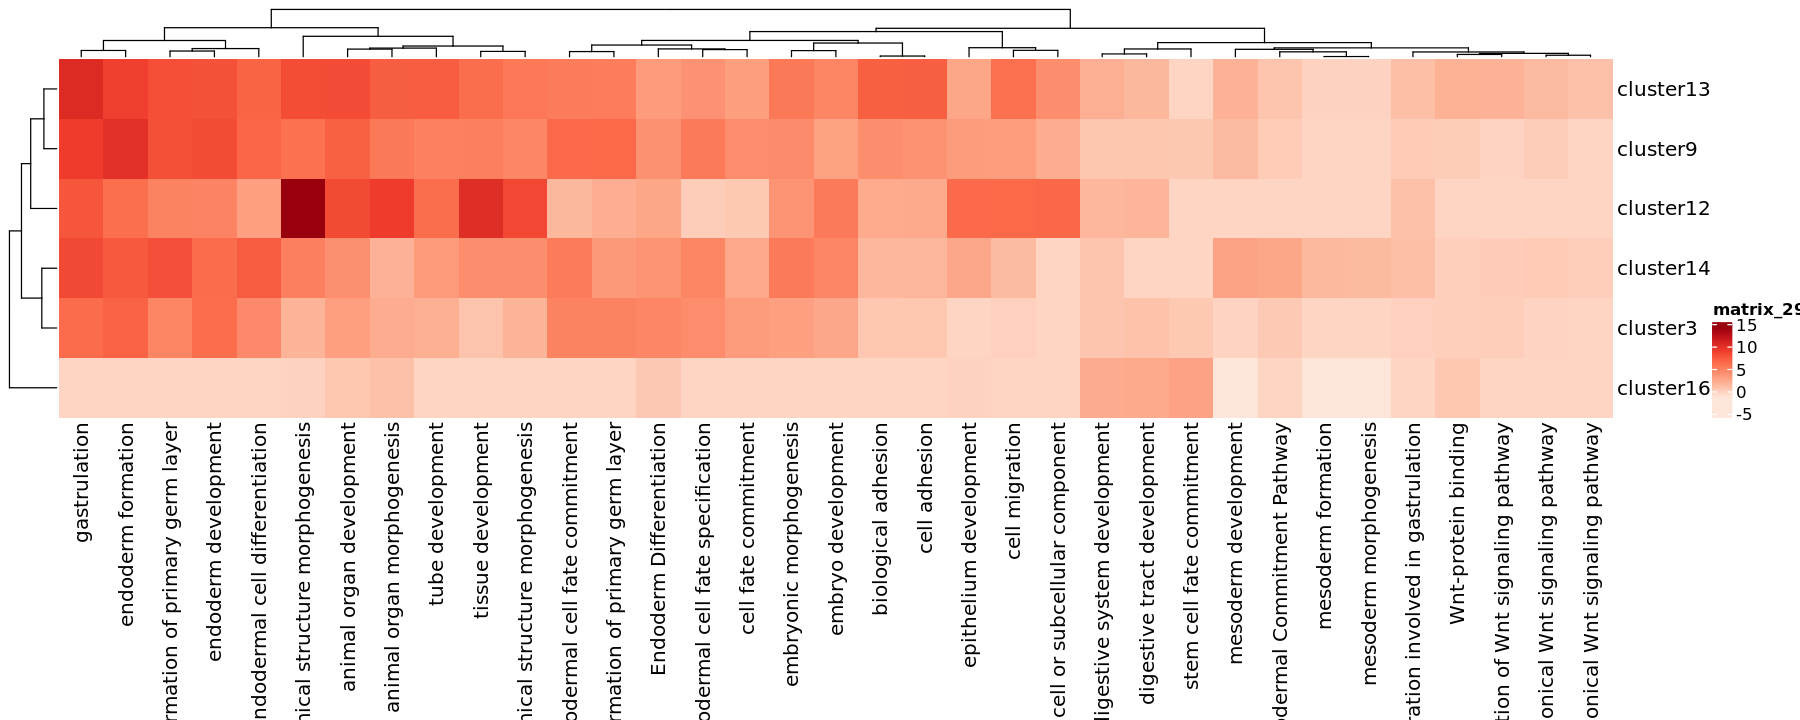

In [127]:
options(repr.plot.width = 15, repr.plot.height = 6) 
Heatmap(mat0[c("cluster9","cluster13","cluster3","cluster14","cluster12","cluster16"),], col = brewer.pal(7,"Reds"))